In [38]:
import json
import glob
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
conn = sqlite3.connect('mydatabase.db')

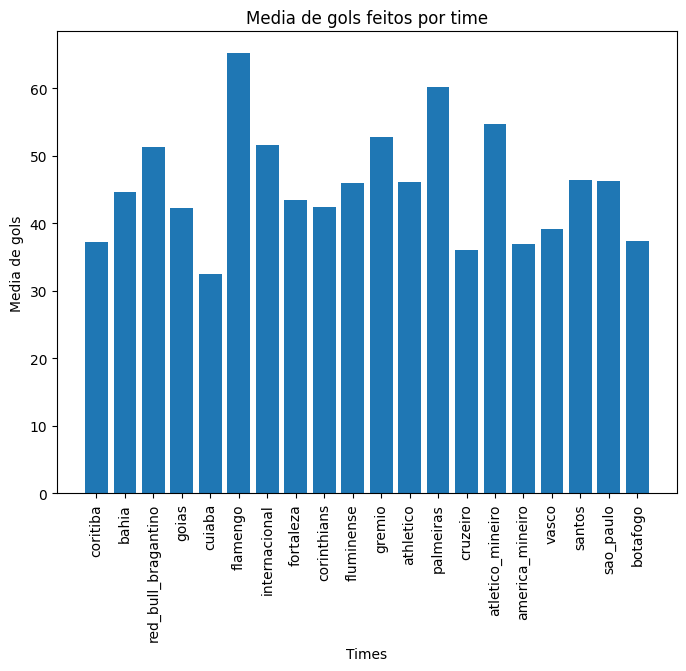

In [39]:
c = conn.cursor()
c.execute('SELECT goalsScored, teams FROM mytable')
rows = c.fetchall()
c.close()

arr = []
times = []

for row in rows:
    dc = eval(row[0])
    times.append(row[1])
    arr.append(dc['Media'])

plt.figure(figsize=(8, 6))
plt.bar(times, arr)
plt.title('Media de gols feitos por time')
plt.ylabel('Media de gols')
plt.xlabel('Times')
plt.xticks(rotation=90)
plt.show()

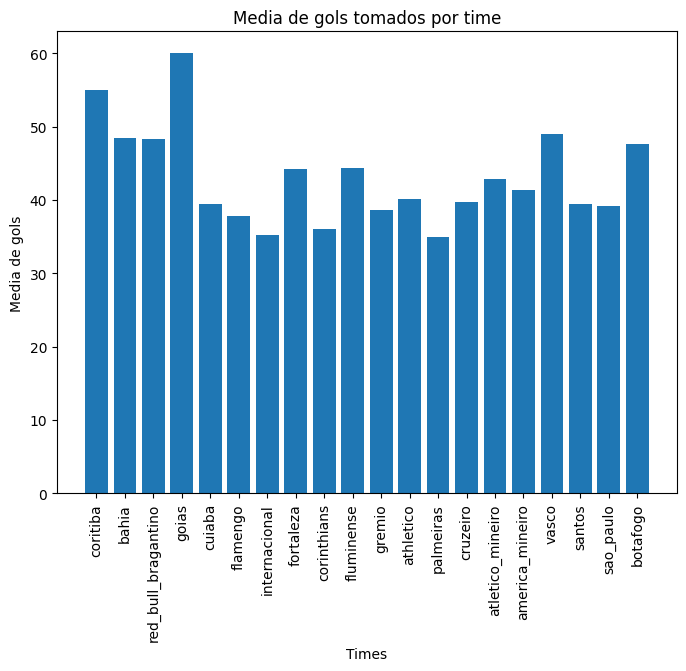

In [40]:
c = conn.cursor()
c.execute('SELECT goalsConceded, teams FROM mytable')
rows = c.fetchall()

c.close()
arr = []
times = []

for row in rows:
    dc = eval(row[0])
    times.append(row[1])
    arr.append(dc['Media'])

plt.figure(figsize=(8, 6))
plt.bar(times, arr)
plt.title('Media de gols tomados por time')
plt.ylabel('Media de gols')
plt.xlabel('Times')
plt.xticks(rotation=90)
plt.show()

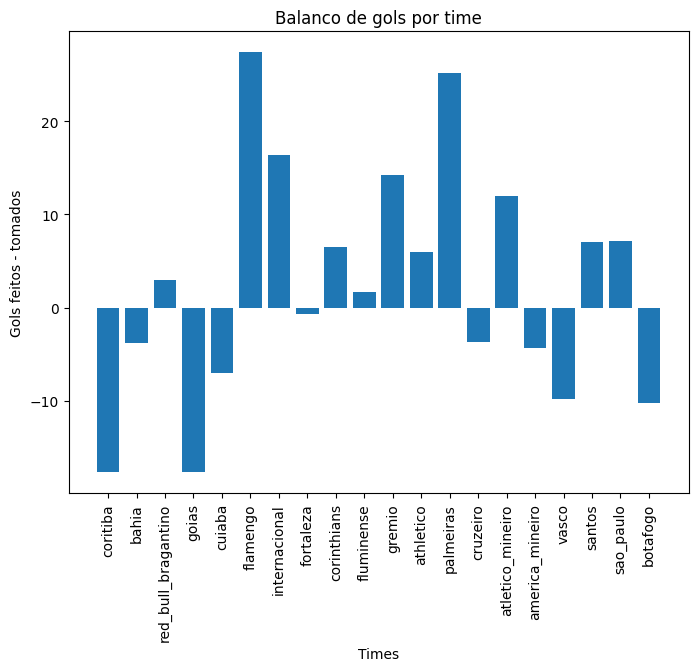

In [41]:
c = conn.cursor()
c.execute('SELECT goalsScored, goalsConceded, teams FROM mytable')
rows = c.fetchall()
c.close()

arr = []
times = []

for row in rows:
  gs = eval(row[0])
  gc = eval(row[1])
  arr.append(gs['Media'] - gc['Media'])
  times.append(row[2])


plt.figure(figsize=(8, 6))
plt.bar(times, arr)
plt.title('Balanco de gols por time')
plt.ylabel('Gols feitos - tomados')
plt.xlabel('Times')
plt.xticks(rotation=90)
plt.show()

<ipython-input-50-1311ca95456b>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(times, rotation=90)


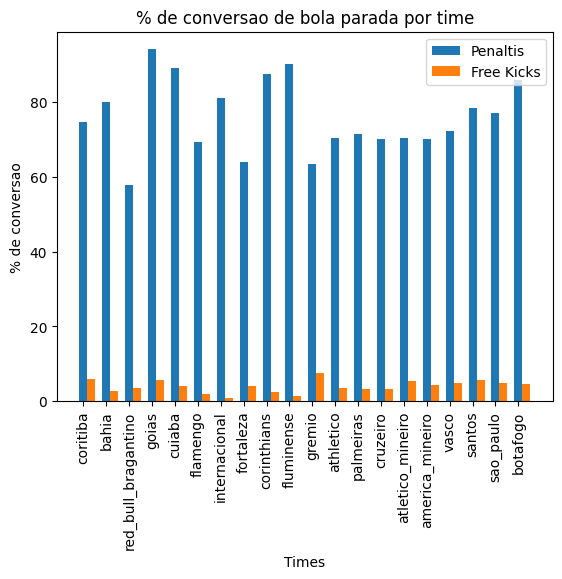

In [50]:
c = conn.cursor()
c.execute('SELECT penaltyGoals, penaltiesTaken, freeKickGoals, freeKickShots, teams FROM mytable')
rows = c.fetchall()
c.close()

arr = []
arr1 = []
times = []

for row in rows:
  pg = eval(row[0])['Media']
  pt = eval(row[1])['Media']
  x = (pg * 100) / pt

  fkg = eval(row[2])['Media']
  fks = eval(row[3])['Media']
  y = (fkg * 100) / fks

  arr.append(x)
  arr1.append(y)
  times.append(row[4])
    
bar_width = 0.35
fig, ax = plt.subplots()
ax.bar(times, arr, width=bar_width, label="Penaltis")
ax.bar([x + bar_width for x in range(len(times))], arr1, width=bar_width, label="Free Kicks")
ax.set_xlabel("Times")
ax.set_ylabel("% de conversao")
ax.set_title("% de conversao de bola parada por time")
ax.set_xticklabels(times, rotation=90)
ax.legend()
plt.show()

In [1]:
# CRIAÇÃO DA TABELA (NÃO EXECUTAR)

times = ["coritiba", "bahia", "red_bull_bragantino", "goias", "cuiaba", "flamengo", "internacional", "fortaleza", "corinthians", "fluminense", "gremio", "athletico", "palmeiras", "cruzeiro", "atletico_mineiro", "america_mineiro", "vasco", "santos", "sao_paulo", "botafogo"]

json_dir = "/content/times/"
json_data = []

for filename in glob.glob(json_dir + "*.json"):
    with open(filename) as f:
        data = json.load(f)
        json_data.append(data)

df = pd.DataFrame(json_data)

df = df.astype(str)

df.to_sql("mytable", conn, if_exists="replace", index=False)


20